# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import requests
import time
import random
import json
import seaborn as sns 
from citipy import citipy
from datetime import datetime

outputdata = "output.csv"


## Generate Cities List

In [138]:
lat_longs= []
cities = []


In [139]:
# Range of latitudes and longitudes
lat_range = {'min': -90, 'max': 90}
lng_range = {'min': -180, 'max': 180}

lat_values = np.arange(lat_range['min'], lat_range['max'], 0.01)
lng_values = np.arange(lng_range['min'], lng_range['max'], 0.01)


In [140]:
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-84.000, high=84.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(len(cities))

652


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [141]:
apikey= "ab0c848f1805525ff8be034d2bd243eb"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + apikey
units = "impirial"

query_url = url +"&units=" + units + "&q="
'''
response = requests.get(query_url + 'atlanta')
jpull = response.json()
print(jpull['sys']['country'])
'''

"\nresponse = requests.get(query_url + 'atlanta')\njpull = response.json()\nprint(jpull['sys']['country'])\n"

In [142]:
search_data = []
city_List = []
country_List = []


searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        countryyyy = jpull['sys']['country']
        searchCityID = jpull['id']
        search_data.append(jpull)
        city_List.append(city)
        country_List.append(countryyyy)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")


Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 0 for the city: rikitea
Record found for city: rikitea with city id: 4030556
Processing record 1 for the city: praia da vitoria
Record found for city: praia da vitoria with city id: 3372760
Processing record 2 for the city: pevek
Record found for city: pevek with city id: 2122090
Processing record 3 for the city: bhitarwar
Record found for city: bhitarwar with city id: 1275905
Processing record 4 for the city: pouembout
Record found for city: pouembout with city id: 2138592
Processing record 5 for the city: presidente dutra
Record found for city: presidente dutra with city id: 3391220
Processing record 6 for the city: cape town
Record found for city: cape town with city id: 3369157
Processing record 7 for the city: clyde river
Record found for city: clyde river with city id: 5924351
Processing record 8 for the city: anadyr
Record found for city: anadyr with city id: 2127202
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [143]:
lat = []
lon = []
foundCities = []
maxtemp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: rikitea
City processed: praia da vitoria
City processed: pevek
City processed: bhitarwar
City processed: pouembout
City processed: presidente dutra
City processed: cape town
City processed: clyde river
City processed: anadyr
City processed: mataura
City processed: port alfred
City processed: mahebourg
City processed: ahipara
City processed: guerrero negro
City NOT found: marcona
City processed: sandwick
City processed: broken hill
City processed: bloomsburg
City processed: trairi
City processed: bahia honda
City processed: jamestown
City processed: carnarvon
City processed: urdari
City processed: yellowknife
City processed: hobart
City processed: pangkalanbuun
City processed: kahului
City processed: mackay
City processed: punta arenas
City processed: san patricio
City processed: busselton
City processed: cham
City processed: erenhot
City processed: kapaa
City processed: nabire
City processed: albany
City processed: gumdag
City processed: bluff
City processed: necochea
C

In [144]:
weather_info = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Max Temperature": maxtemp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [145]:
weather_info = weather_info[["City","Latitude","Longitude","Max Temperature","Humidity","Cloudiness","Wind Speed","Country", "Date"]]
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             600 non-null    object 
 1   Latitude         600 non-null    float64
 2   Longitude        600 non-null    float64
 3   Max Temperature  600 non-null    float64
 4   Humidity         600 non-null    int64  
 5   Cloudiness       600 non-null    int64  
 6   Wind Speed       600 non-null    float64
 7   Country          600 non-null    object 
 8   Date             600 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 42.3+ KB


In [146]:
weather_info.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,75.65,80,67,18.88,PF,1656051144
1,praia da vitoria,38.7333,-27.0667,65.75,81,15,13.38,PT,1656051145
2,pevek,69.7008,170.3133,32.18,99,100,11.99,RU,1656051145
3,bhitarwar,25.8000,78.1167,100.62,21,7,3.40,IN,1656051145
4,pouembout,-21.1333,164.9000,72.01,80,100,5.01,NC,1656051145


In [164]:
weather_info.to_csv(r'output.csv', index = False)


In [147]:
#humidity over 100 to be removed if any;
hum100 = weather_info[(weather_info)['Humidity'] > 100]
hum100
#therefore none? 

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [148]:
#indicies
hum100.index 

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

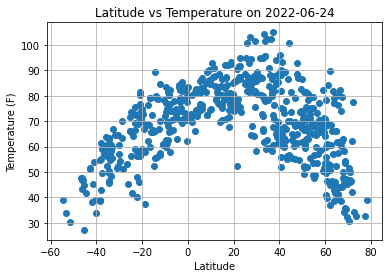

In [149]:
#set data to plot

endrundate= weather_info["Date"].max()
rundate=datetime.utcfromtimestamp(endrundate).strftime('%Y-%m-%d')

x = weather_info["Latitude"]
y = weather_info["Max Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {rundate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig("latvstemp")
#display plot!
plt.show()

## Latitude vs. Humidity Plot

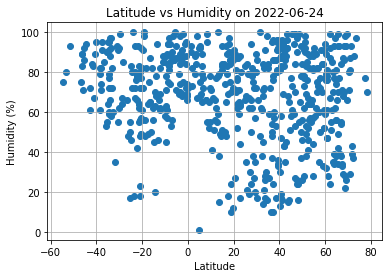

<Figure size 432x288 with 0 Axes>

In [150]:
humid=weather_info["Humidity"]
plt.scatter(x,humid)
plt.title(f"Latitude vs Humidity on {rundate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

plt.savefig("latvshum")

## Latitude vs. Cloudiness Plot

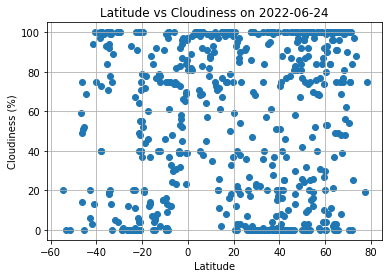

<Figure size 432x288 with 0 Axes>

In [151]:
cloudss= weather_info["Cloudiness"]
plt.scatter(x,cloudss)
plt.title(f"Latitude vs Cloudiness on {rundate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

plt.savefig("latvsclouds")
    

## Latitude vs. Wind Speed Plot

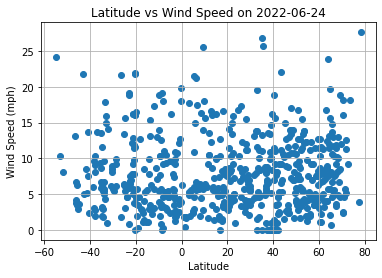

<Figure size 432x288 with 0 Axes>

In [152]:
windspeedz= weather_info["Wind Speed"]
plt.scatter(x,windspeedz)
plt.title(f"Latitude vs Wind Speed on {rundate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

plt.savefig("latvswinds")

## Linear Regression

In [153]:
from scipy.stats import linregress

In [154]:
#damn
def linearregression(x_values, y_values,title,y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values= x_values * slope + intercept
    lineeqq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(lineeqq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.title(f'{title}')
    print(f"The r-squared is: {rvalue}")

In [155]:
northernhems= weather_info.loc[(weather_info["Latitude"]>= 0)]
southernhems=weather_info.loc[(weather_info["Latitude"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6185834145829974


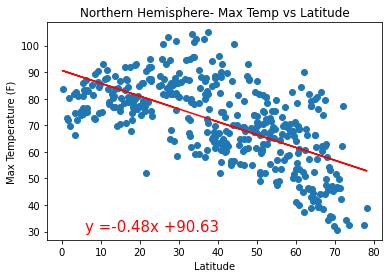

In [156]:
x_values= northernhems["Latitude"]
y_values= northernhems["Max Temperature"]
y_label= "Max Temperature (F)"
title= "Northern Hemisphere- Max Temp vs Latitude"
linearregression(x_values, y_values, title, y_label, (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7467047792074759


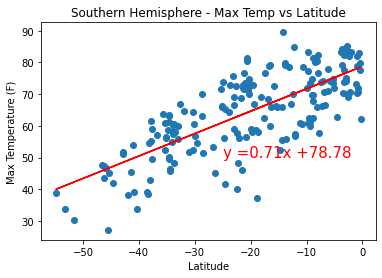

In [157]:
x_values=southernhems["Latitude"]
y_values=southernhems["Max Temperature"]
y_label="Max Temperature (F)"
title="Southern Hemisphere - Max Temp vs Latitude"
linearregression(x_values,y_values,title, y_label, (-25,50))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.042989477150584585


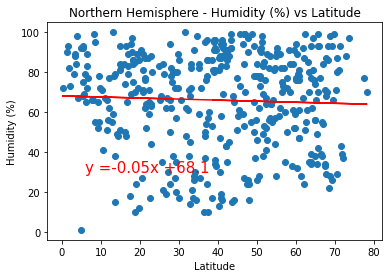

In [158]:
x_values=northernhems["Latitude"]
y_values=northernhems["Humidity"]
y_label= "Humidity (%)"
title = "Northern Hemisphere - Humidity (%) vs Latitude"
linearregression(x_values,y_values,title,y_label, (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007054858100685576


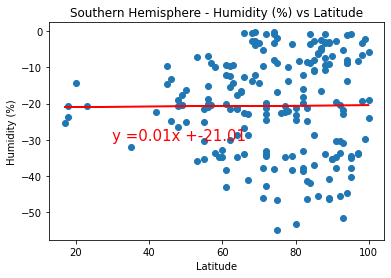

In [159]:
x_values=southernhems["Humidity"]
y_values=southernhems["Latitude"]
y_label="Humidity (%)"
title= "Southern Hemisphere - Humidity (%) vs Latitude"
linearregression(x_values, y_values, title, y_label, (30,-30))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03317676634769508


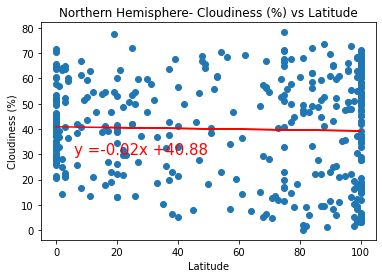

In [160]:
x_values=northernhems["Cloudiness"]
y_values=northernhems["Latitude"]
y_label="Cloudiness (%)"
title= "Northern Hemisphere- Cloudiness (%) vs Latitude"
linearregression(x_values, y_values, title, y_label, (6,30))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0014637655538414873


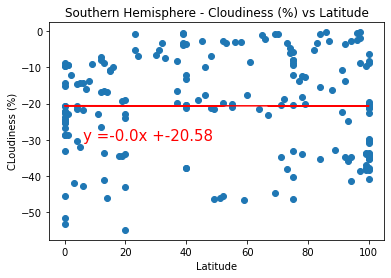

In [161]:
x_values=southernhems["Cloudiness"]
y_values=southernhems["Latitude"]
y_label="CLoudiness (%)"
title="Southern Hemisphere - Cloudiness (%) vs Latitude"
linearregression(x_values, y_values,title, y_label,(6,-30))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07058208164485144


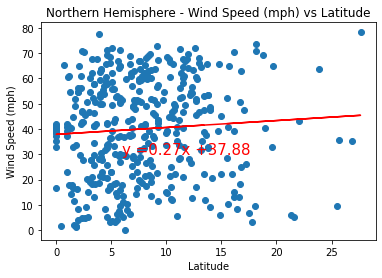

In [162]:
x_values=northernhems["Wind Speed"]
y_values=northernhems["Latitude"]
y_label= "Wind Speed (mph)"
title= "Northern Hemisphere - Wind Speed (mph) vs Latitude"
linearregression(x_values, y_values, title, y_label, (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07812453174712047


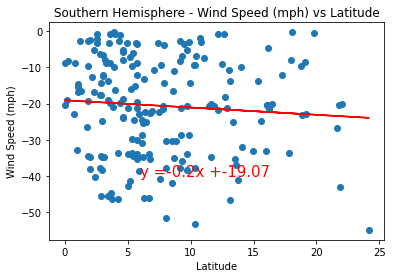

In [163]:
x_values=southernhems["Wind Speed"]
y_values=southernhems["Latitude"]
y_label="Wind Speed (mph)"
title= "Southern Hemisphere - Wind Speed (mph) vs Latitude"
linearregression(x_values, y_values, title, y_label, (6,-40))